In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.shape

(2111, 17)

In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = encoder.fit_transform(df['FAVC'])
df['CAEC'] = encoder.fit_transform(df['CAEC'])
df['SMOKE'] = encoder.fit_transform(df['SMOKE'])
df['SCC'] = encoder.fit_transform(df['SCC'])
df['CALC'] = encoder.fit_transform(df['CALC'])
df['MTRANS'] = encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])

In [8]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Support Vector Machine (SVM) Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)

In [11]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        68
           1       0.44      0.31      0.36        78
           2       0.60      0.32      0.42        94
           3       0.77      0.45      0.57        75
           4       0.59      1.00      0.74        79
           5       0.49      0.52      0.50        71
           6       0.40      0.52      0.46        63

    accuracy                           0.56       528
   macro avg       0.57      0.57      0.54       528
weighted avg       0.57      0.56      0.54       528



In [12]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

In [13]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.84      0.92      0.88        78
           2       0.98      0.95      0.96        94
           3       0.95      0.97      0.96        75
           4       1.00      0.99      0.99        79
           5       0.91      0.86      0.88        71
           6       0.95      0.95      0.95        63

    accuracy                           0.94       528
   macro avg       0.94      0.94      0.94       528
weighted avg       0.94      0.94      0.94       528



In [14]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)

In [15]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        68
           1       0.83      0.83      0.83        78
           2       0.95      0.94      0.94        94
           3       0.96      0.96      0.96        75
           4       1.00      0.99      0.99        79
           5       0.88      0.89      0.88        71
           6       0.97      0.94      0.95        63

    accuracy                           0.93       528
   macro avg       0.93      0.93      0.93       528
weighted avg       0.93      0.93      0.93       528



In [19]:
# Logistic Regression Classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)

In [17]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81        68
           1       0.57      0.42      0.49        78
           2       0.63      0.55      0.59        94
           3       0.78      0.93      0.85        75
           4       0.91      1.00      0.95        79
           5       0.55      0.46      0.50        71
           6       0.39      0.46      0.42        63

    accuracy                           0.67       528
   macro avg       0.66      0.67      0.66       528
weighted avg       0.66      0.67      0.66       528



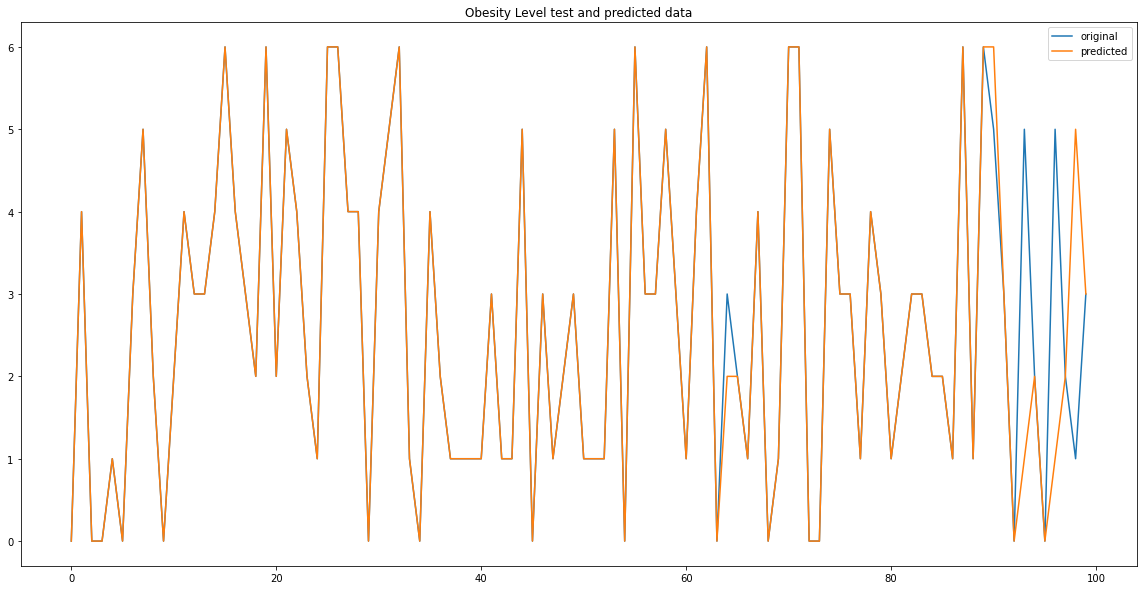

In [34]:
x_ax = range(100)
plt.figure(figsize=(20, 10))
plt.plot(x_ax, y_test[:100], label="original")
plt.plot(x_ax, rf_predictions[:100], label="predicted")
plt.title("Obesity Level test and predicted data")
plt.legend()
plt.show()

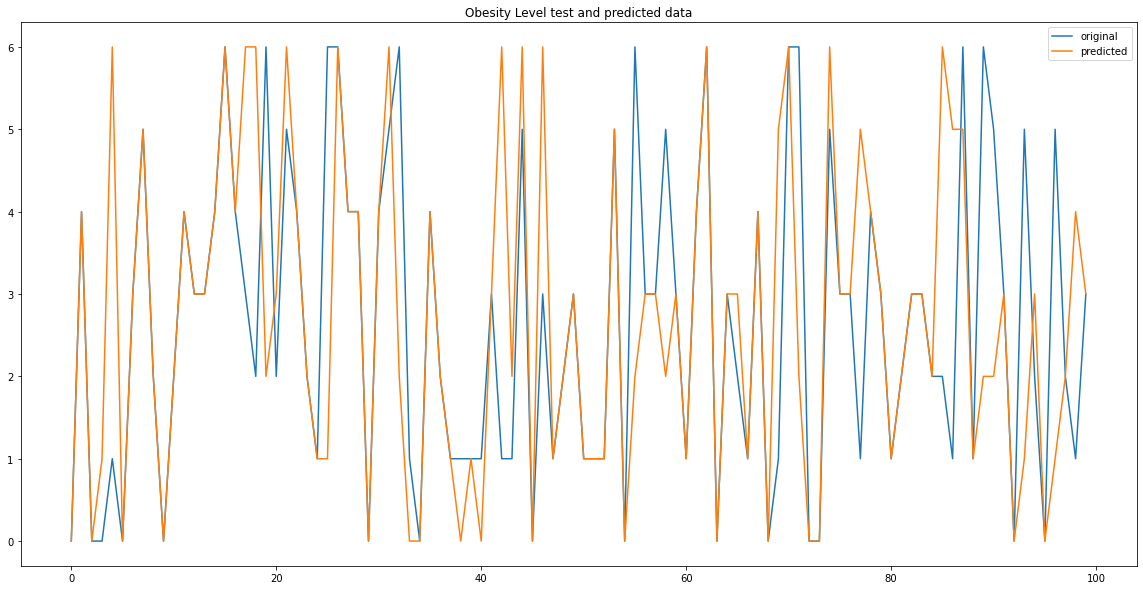

In [35]:
x_ax = range(100)
plt.figure(figsize=(20, 10))
plt.plot(x_ax, y_test[:100], label="original")
plt.plot(x_ax, lr_predictions[:100], label="predicted")
plt.title("Obesity Level test and predicted data")
plt.legend()
plt.show()

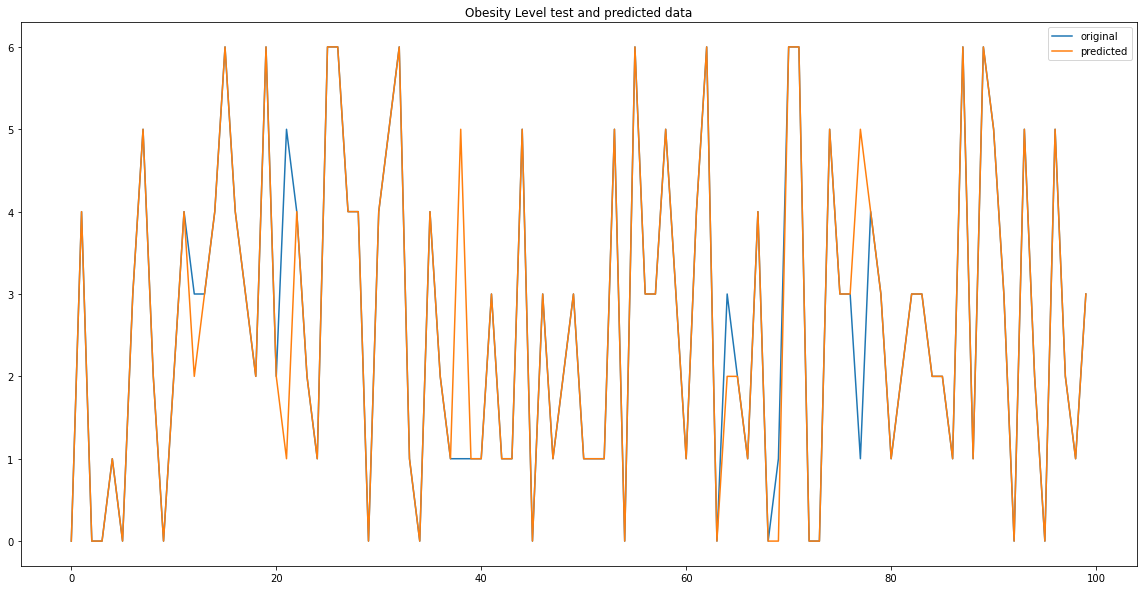

In [36]:
x_ax = range(100)
plt.figure(figsize=(20, 10))
plt.plot(x_ax, y_test[:100], label="original")
plt.plot(x_ax, dt_predictions[:100], label="predicted")
plt.title("Obesity Level test and predicted data")
plt.legend()
plt.show()

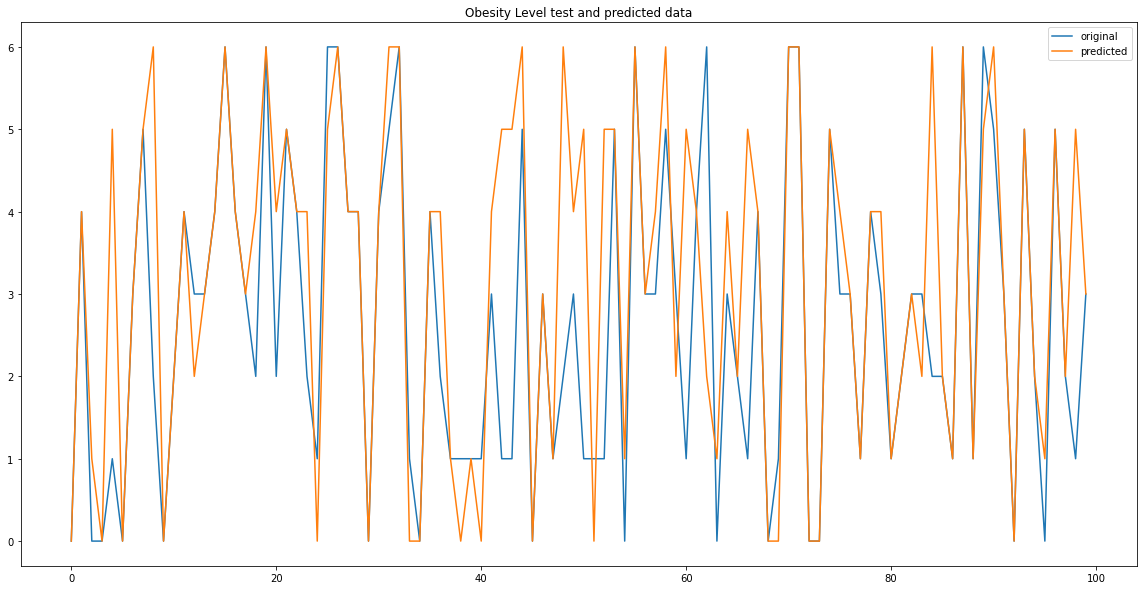

In [38]:
x_ax = range(100)
plt.figure(figsize=(20, 10))
plt.plot(x_ax, y_test[:100], label="original")
plt.plot(x_ax, svm_predictions[:100], label="predicted")
plt.title("Obesity Level test and predicted data")
plt.legend()
plt.show()